In [ ]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

dir_folder = '/content/drive/MyDrive/data3/testing/'
x_train = []
y_train = []
labels = []
count = 0

for i in os.listdir(dir_folder):

  path = os.path.join(dir_folder, i)
  labels.append(str(i))

  for j in os.listdir(path):

    path_img = os.path.join(path,j)
    
    img = load_img(path_img, target_size=(224,224)) 
    img = img_to_array(img)
    img = img.reshape(224,224,3) 
    img = img.astype('float32')
    img = img/255

    x_train.append(img)
    y_train.append(count)

  count += 1

In [ ]:
from keras.utils import np_utils
import numpy as np
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = np_utils.to_categorical(y_train)

print(x_train.shape, y_train.shape)

(903, 224, 224, 3) (903, 12)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=70)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(722, 224, 224, 3) (722, 12)
(181, 224, 224, 3) (181, 12)


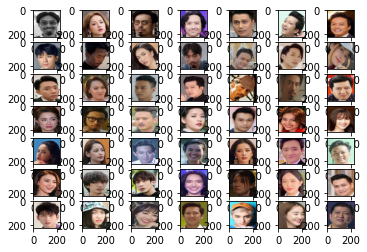

In [ ]:
import matplotlib.pyplot as plt
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.imshow(x_train[i])
  plt.show

In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3), strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same', strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', kernel_initializer='he_uniform', activation='relu', strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu',input_shape=(224*224*3,))) 
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.000001),metrics = ['accuracy'])               
history = model.fit(x_train, y_train, epochs=500, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       32896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
23/23 [==============================] - 2s 55ms/step - loss: 2.6134 - accuracy: 0.1011
Epoch 2/500
23/23 [==============================] - 1s 53ms/step - loss: 2.5500 - accuracy: 0.0997
Epoch 3/500
23/23 [==============================] - 1s 53ms/step - loss: 2.5461 - accuracy: 0.0900
Epoch 4/500
23/23 [==============================] - 1s 53ms/step - loss: 2.5096 - accuracy: 0.1066
Epoch 5/500
23/23 [==============================] - 1s 53ms/step - loss: 2.4935 - accuracy: 0.0970
Epoch 6/500
23/23 [==============================] - 1s 53ms/step - loss: 2.4844 - accuracy: 0.1053
Epoch 7/500
23/23 [==============================] - 1s 54ms/step - loss: 2.4767 - accuracy: 0.0970
Epoch 8/500
23/23 [==============================] - 1s 53ms/step - loss: 2.4576 - accuracy: 0.1302
Epoch 9/500
23/23 [==============================] - 1s 53ms/step - loss: 2.4601 - accuracy: 0.1177
Epoch 10/500
23/23 [==============================] - 1s 53ms/step - loss: 2.4696 - accuracy: 0.1205

In [ ]:
model.save('Model.h5')

<function matplotlib.pyplot.show>

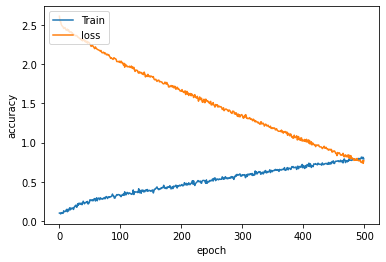

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','loss'],loc='upper left')
plt.show

In [ ]:
from keras.models import load_model
model = load_model('Model.h5')

In [ ]:
print(labels)

['vietanh', 'tuantran', 'truonggiang', 'chipu', 'junvu', 'dieunhi', 'hongdang', 'nhaphuong', 'tranthanh', 'denvau', 'sontung', 'lanngoc']


In [ ]:
classes = ['vietanh', 'tuantran', 'truonggiang', 'chipu', 'junvu', 'dieunhi', 'hongdang', 'nhaphuong', 'tranthanh', 'denvau', 'sontung', 'lanngoc']

[[0.10034854 0.03760109 0.07426175 0.0745431  0.00775326 0.02041506
  0.10057726 0.03262839 0.03896394 0.02662874 0.37423146 0.11204741]]
[10]
sontung


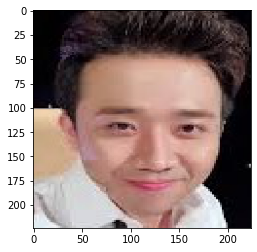

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/data3/11.png', target_size=(224,224))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,224,224,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])